In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project/

/content/drive/MyDrive/Project


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import json


business_df = pd.read_json('/content/drive/MyDrive/Project/yelp_academic_dataset_business.json', lines=True)


In [ ]:
# Recommendations will be valid only if the business is still open
# 1 = open, 0 = closed

business_df = business_df[business_df['is_open']==1]


In [ ]:
#Checking null values
business_df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      12348
categories         95
hours           16095
dtype: int64

In [ ]:
not_null_rows = business_df[business_df['categories'].notnull()]


In [ ]:
not_null_rows.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      12254
categories          0
hours           16000
dtype: int64

In [ ]:
#Getting count of all categories of business
business_overall = not_null_rows.assign(categories = not_null_rows.categories.str.split(', ')).explode('categories')
cat = business_overall.categories.value_counts()
cat = cat.to_frame().reset_index()
cat.columns = ['Categories', 'Count']
cat

,Categories,Count
0,Restaurants,34987
1,Food,20419
2,Shopping,20186
3,Home Services,13322
4,Beauty & Spas,12263
...,...,...
1297,Guamanian,1
1298,Cheese Tasting Classes,1
1299,Bike Repair,1
1300,Tonkatsu,1


In [ ]:
#Category sort by count
cat= cat.sort_values(by = 'Count', ascending = False)

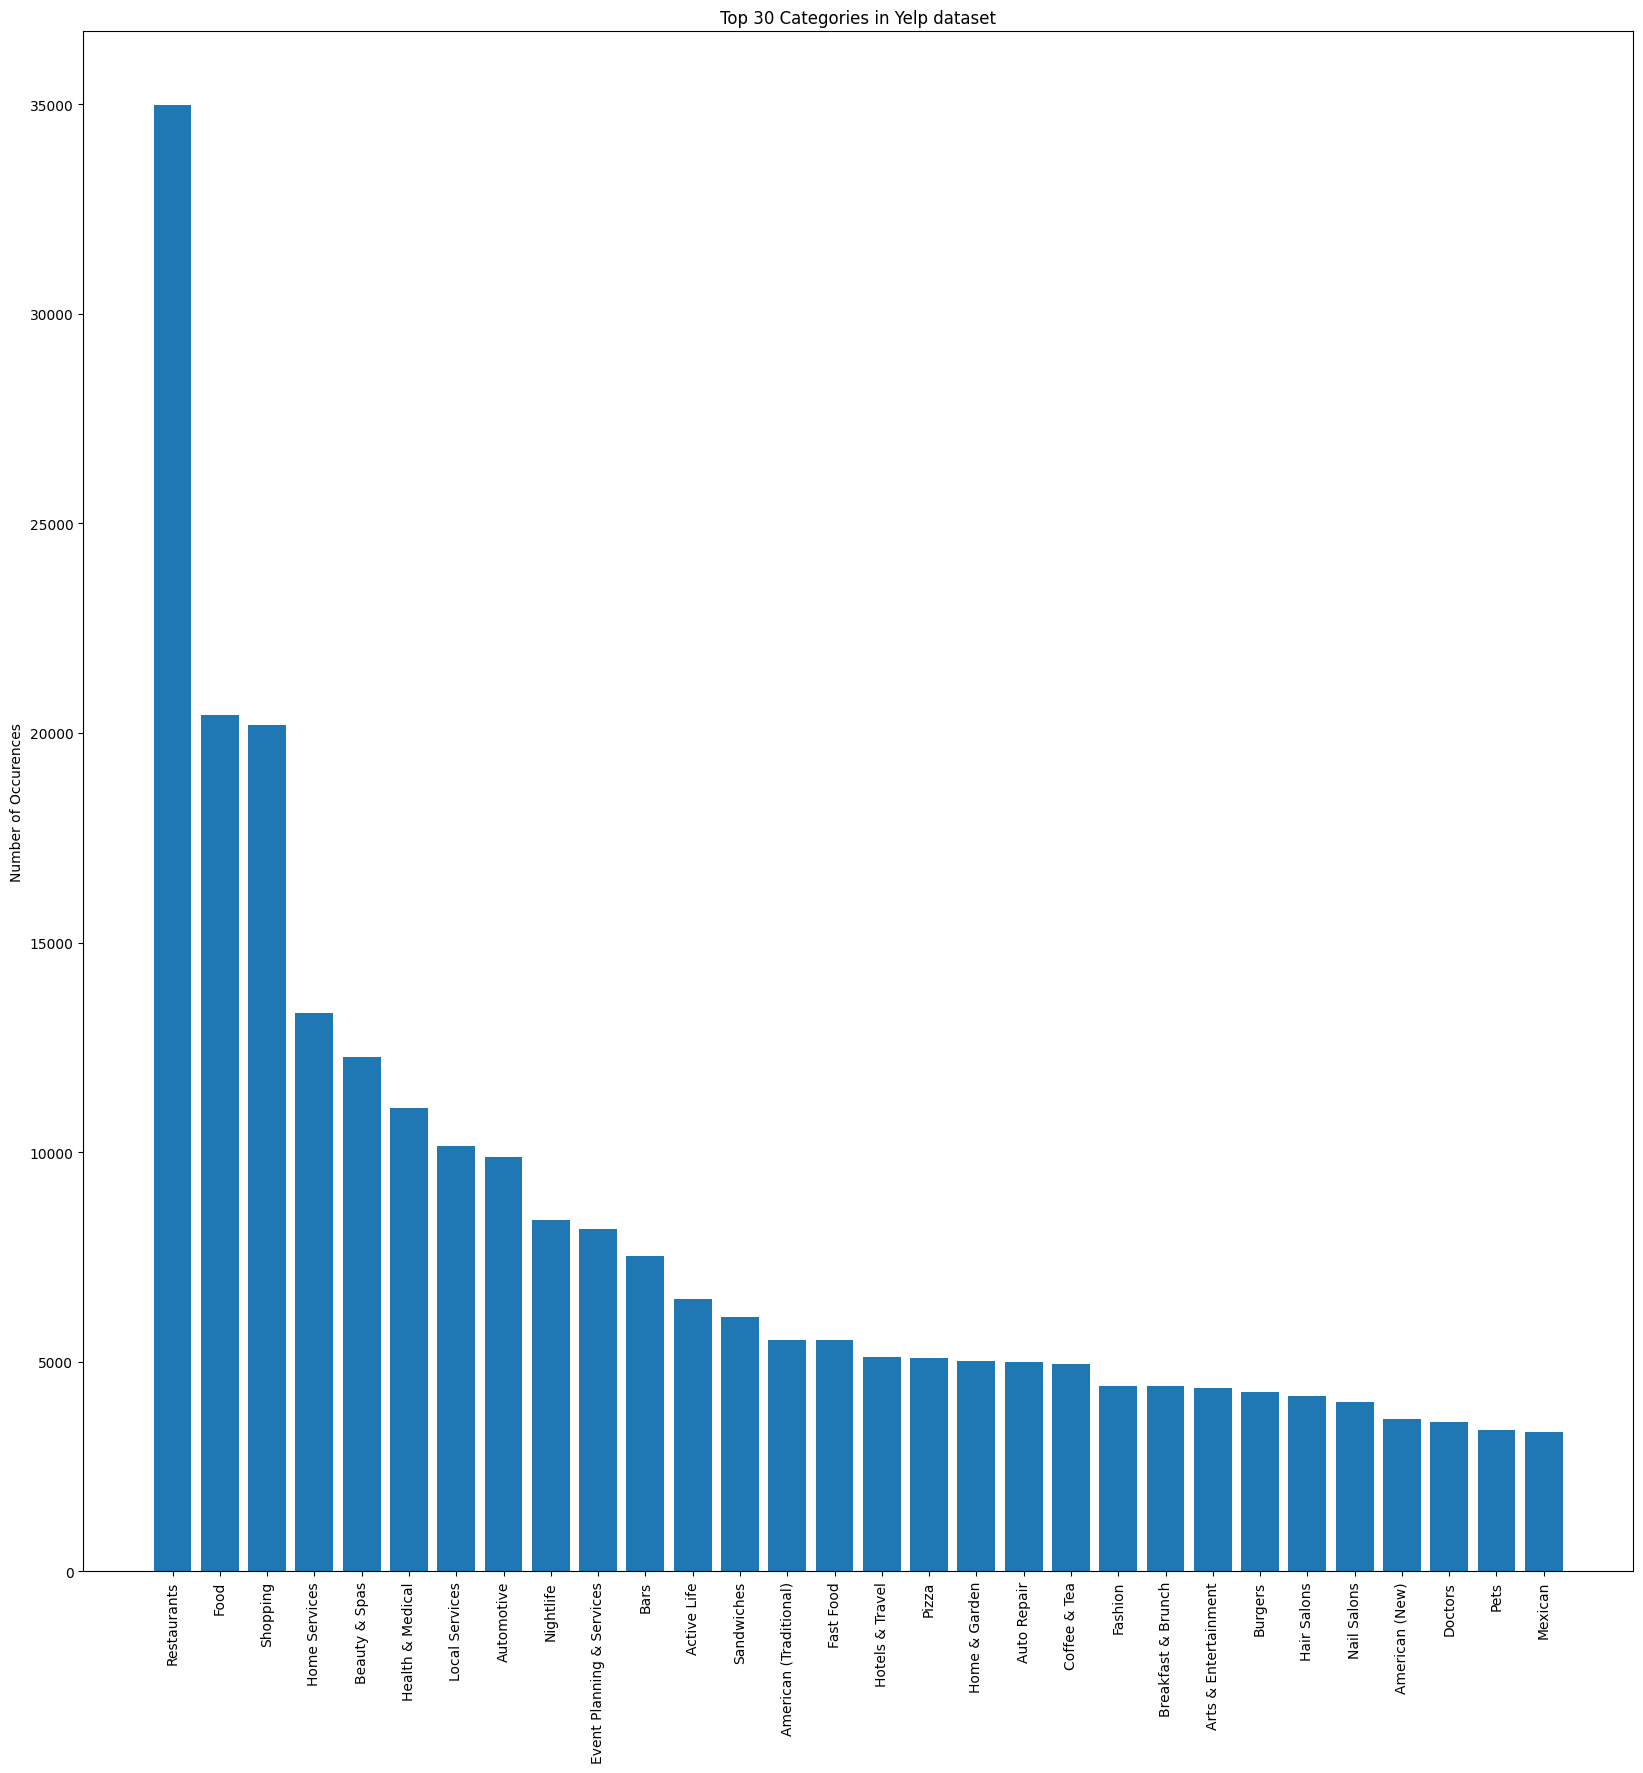

In [ ]:
cat = cat[0:30]
objects = list(cat.Categories)
y_pos = np.arange(len(objects))
Numbers = list(cat.Count)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Number of Occurences')
plt.title('Top 30 Categories in Yelp dataset')
plt.show()

<Axes: xlabel='state', ylabel='count'>

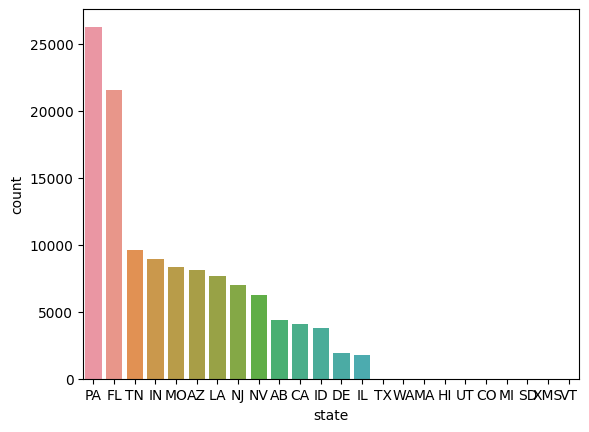

In [ ]:
#Count of restaurants in each location
sns.countplot(data = not_null_rows,x = 'state',
             order = not_null_rows['state'].value_counts().index
             )

In [ ]:
not_null_rows = not_null_rows[not_null_rows['categories'].str.contains('Restaurants')]
not_null_rows.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."


In [ ]:
import folium
import plotly.express as px

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 78.0 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd

In [ ]:
notnull_res_map=px.scatter_mapbox(not_null_rows, lat='latitude',lon='longitude',color='stars',size='review_count',mapbox_style="carto-darkmatter")

In [ ]:
notnull_res_map

In [ ]:
bc = not_null_rows[not_null_rows['state']=='ID']

# getting a look at the top 5 cities with associated businesses in the state of Arizona
bc['city'].value_counts().head(5)

Boise          601
Meridian       236
Eagle           63
Garden City     32
Boise City       5
Name: city, dtype: int64

In [ ]:
bc = bc[~bc['categories'].str.contains('Fast Food')]
bc.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
258,wZhGuW7vQpfhxeEvLHkTrA,Express Cafe,400 E Fairview Ave,Meridian,ID,83642,43.619649,-116.387139,4.5,119,1,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Restaurants, Breakfast & Brunch","{'Monday': '7:0-14:0', 'Tuesday': '6:30-14:0',..."
559,ZpmSEd9N042IJanBiKlKiQ,Smoke & Thyme,701 W Fulton St,Boise,ID,83702,43.611192,-116.206275,4.0,19,1,"{'RestaurantsDelivery': 'True', 'Caters': 'Tru...","American (New), Barbeque, Restaurants, Burgers...","{'Wednesday': '11:0-21:0', 'Thursday': '11:0-2..."
628,TJe1ZGe-X0-GjOQd00kKxA,Brixx Craft House,"7700 W State St, Ste 100",Boise,ID,83714,43.671633,-116.283591,4.0,115,1,"{'HasTV': 'True', 'BusinessParking': '{'garage...","American (Traditional), Pubs, Sports Bars, Nig...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."
779,ZH-D4qbLggBSvwpF0zXrQQ,The Original Pancake House,5900 W Fariview Ave,Boise,ID,83704,43.619246,-116.254688,4.0,155,1,"{'BusinessParking': '{'garage': False, 'street...","Breakfast & Brunch, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '7:0-13:0', '..."
857,4FaYG9qKDpDyr68bKmaIEw,Capitol Cellars,110 S 5th St,Boise,ID,83702,43.613573,-116.199904,4.0,176,1,"{'Smoking': 'u'no'', 'RestaurantsGoodForGroups...","Restaurants, Bars, Wine Bars, American (Tradit...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."


In [ ]:
bc.shape

(747, 14)

In [ ]:
review_df = pd.read_json('/content/drive/MyDrive/Project/yelp_academic_dataset_review.json', lines = True)

In [ ]:
rev_b = pd.merge(review_df,bc, on ='business_id')
rev_b.shape[0]

78990

In [ ]:
rev_b

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,Lk21QNbrI_e3nf0GvWSPww,bCla27ma_6i_QFrGkILKrQ,sLgnx_WFCjEoPsS6NwU70Q,5,0,0,0,Our family returned for breakfast again this w...,2014-10-27 16:31:37,Le Peep,...,ID,83646,43.632783,-116.352393,4.0,259,1,"{'WheelchairAccessible': 'True', 'BusinessPark...","Event Planning & Services, Salad, Caterers, Am...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
1,8PQcD-TECxxGUnGNV83QZQ,wW9SywjWgtjAMveKR0r3lA,sLgnx_WFCjEoPsS6NwU70Q,5,1,0,0,Great food and friendly service. I will defini...,2014-06-28 15:44:10,Le Peep,...,ID,83646,43.632783,-116.352393,4.0,259,1,"{'WheelchairAccessible': 'True', 'BusinessPark...","Event Planning & Services, Salad, Caterers, Am...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
2,fUWM7VUobB5f3lGh14PvCQ,WlC6KcnjCK9nWW3kEI2YQw,sLgnx_WFCjEoPsS6NwU70Q,5,1,0,1,First time for lunch. Extensive and flavorful...,2015-01-04 15:04:05,Le Peep,...,ID,83646,43.632783,-116.352393,4.0,259,1,"{'WheelchairAccessible': 'True', 'BusinessPark...","Event Planning & Services, Salad, Caterers, Am...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
3,s7FVP7ZxNZqO0to0HncXfw,UwfnmYkohjEzcBEctJpF2w,sLgnx_WFCjEoPsS6NwU70Q,5,0,0,0,This place was soooo good. I went for breakfas...,2017-07-08 20:54:13,Le Peep,...,ID,83646,43.632783,-116.352393,4.0,259,1,"{'WheelchairAccessible': 'True', 'BusinessPark...","Event Planning & Services, Salad, Caterers, Am...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
4,tQ3-BJJIHV-2cQ3O5GFY3g,O8jpYFb6QKVNwYvAFzdDqA,sLgnx_WFCjEoPsS6NwU70Q,5,1,0,0,Visited at breakfast time and liked having the...,2014-06-11 16:36:18,Le Peep,...,ID,83646,43.632783,-116.352393,4.0,259,1,"{'WheelchairAccessible': 'True', 'BusinessPark...","Event Planning & Services, Salad, Caterers, Am...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78985,J4oDSEjiI-fzYbiGPNVBDg,pyrgt9XmeHp96fgRXX2Umw,p61Dp2gjj70LOSBDQPUK5Q,5,0,0,0,Best pizza around! Extremely happy we found a ...,2021-10-08 20:46:52,Tony G's Boise,...,ID,83642,43.596440,-116.428797,4.0,9,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Pizza, American (Traditional)","{'Monday': '11:0-20:30', 'Tuesday': '11:0-20:3..."
78986,FN9SsLzPTxjEXCjcuh1aVw,Q_IjLaB8AfWNcvWVQgJd3A,p61Dp2gjj70LOSBDQPUK5Q,2,1,0,0,Their Detroit style pie is glorified cheesy br...,2021-01-16 22:35:43,Tony G's Boise,...,ID,83642,43.596440,-116.428797,4.0,9,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Pizza, American (Traditional)","{'Monday': '11:0-20:30', 'Tuesday': '11:0-20:3..."
78987,_saPP0S__J6tQdJ5C_Vk_g,KmjUYuar9-hSZKNgz8q3sA,p61Dp2gjj70LOSBDQPUK5Q,5,3,0,1,We recently found Crave Delivery app and on th...,2020-12-06 17:31:15,Tony G's Boise,...,ID,83642,43.596440,-116.428797,4.0,9,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Pizza, American (Traditional)","{'Monday': '11:0-20:30', 'Tuesday': '11:0-20:3..."
78988,nsXI0A-e8NyNjx6uB0bI3g,RMKj9X4DAgzhvHQPXfKP5g,p61Dp2gjj70LOSBDQPUK5Q,5,0,1,0,"Okay guys, ready for it? Tony G's is legit. If...",2021-01-22 18:12:24,Tony G's Boise,...,ID,83642,43.596440,-116.428797,4.0,9,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Pizza, American (Traditional)","{'Monday': '11:0-20:30', 'Tuesday': '11:0-20:3..."


In [ ]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 258 to 150327
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   747 non-null    object 
 1   name          747 non-null    object 
 2   address       747 non-null    object 
 3   city          747 non-null    object 
 4   state         747 non-null    object 
 5   postal_code   747 non-null    object 
 6   latitude      747 non-null    float64
 7   longitude     747 non-null    float64
 8   stars         747 non-null    float64
 9   review_count  747 non-null    int64  
 10  is_open       747 non-null    int64  
 11  attributes    735 non-null    object 
 12  categories    747 non-null    object 
 13  hours         686 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 87.5+ KB


In [ ]:
bc['review_count'].sum()

76165

In [ ]:
rev_b.reset_index(drop=True,inplace=True)

In [ ]:
rev_b

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,Lk21QNbrI_e3nf0GvWSPww,bCla27ma_6i_QFrGkILKrQ,sLgnx_WFCjEoPsS6NwU70Q,5,0,0,0,Our family returned for breakfast again this w...,2014-10-27 16:31:37,Le Peep,...,ID,83646,43.632783,-116.352393,4.0,259,1,"{'WheelchairAccessible': 'True', 'BusinessPark...","Event Planning & Services, Salad, Caterers, Am...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
1,8PQcD-TECxxGUnGNV83QZQ,wW9SywjWgtjAMveKR0r3lA,sLgnx_WFCjEoPsS6NwU70Q,5,1,0,0,Great food and friendly service. I will defini...,2014-06-28 15:44:10,Le Peep,...,ID,83646,43.632783,-116.352393,4.0,259,1,"{'WheelchairAccessible': 'True', 'BusinessPark...","Event Planning & Services, Salad, Caterers, Am...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
2,fUWM7VUobB5f3lGh14PvCQ,WlC6KcnjCK9nWW3kEI2YQw,sLgnx_WFCjEoPsS6NwU70Q,5,1,0,1,First time for lunch. Extensive and flavorful...,2015-01-04 15:04:05,Le Peep,...,ID,83646,43.632783,-116.352393,4.0,259,1,"{'WheelchairAccessible': 'True', 'BusinessPark...","Event Planning & Services, Salad, Caterers, Am...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
3,s7FVP7ZxNZqO0to0HncXfw,UwfnmYkohjEzcBEctJpF2w,sLgnx_WFCjEoPsS6NwU70Q,5,0,0,0,This place was soooo good. I went for breakfas...,2017-07-08 20:54:13,Le Peep,...,ID,83646,43.632783,-116.352393,4.0,259,1,"{'WheelchairAccessible': 'True', 'BusinessPark...","Event Planning & Services, Salad, Caterers, Am...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
4,tQ3-BJJIHV-2cQ3O5GFY3g,O8jpYFb6QKVNwYvAFzdDqA,sLgnx_WFCjEoPsS6NwU70Q,5,1,0,0,Visited at breakfast time and liked having the...,2014-06-11 16:36:18,Le Peep,...,ID,83646,43.632783,-116.352393,4.0,259,1,"{'WheelchairAccessible': 'True', 'BusinessPark...","Event Planning & Services, Salad, Caterers, Am...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78985,J4oDSEjiI-fzYbiGPNVBDg,pyrgt9XmeHp96fgRXX2Umw,p61Dp2gjj70LOSBDQPUK5Q,5,0,0,0,Best pizza around! Extremely happy we found a ...,2021-10-08 20:46:52,Tony G's Boise,...,ID,83642,43.596440,-116.428797,4.0,9,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Pizza, American (Traditional)","{'Monday': '11:0-20:30', 'Tuesday': '11:0-20:3..."
78986,FN9SsLzPTxjEXCjcuh1aVw,Q_IjLaB8AfWNcvWVQgJd3A,p61Dp2gjj70LOSBDQPUK5Q,2,1,0,0,Their Detroit style pie is glorified cheesy br...,2021-01-16 22:35:43,Tony G's Boise,...,ID,83642,43.596440,-116.428797,4.0,9,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Pizza, American (Traditional)","{'Monday': '11:0-20:30', 'Tuesday': '11:0-20:3..."
78987,_saPP0S__J6tQdJ5C_Vk_g,KmjUYuar9-hSZKNgz8q3sA,p61Dp2gjj70LOSBDQPUK5Q,5,3,0,1,We recently found Crave Delivery app and on th...,2020-12-06 17:31:15,Tony G's Boise,...,ID,83642,43.596440,-116.428797,4.0,9,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Pizza, American (Traditional)","{'Monday': '11:0-20:30', 'Tuesday': '11:0-20:3..."
78988,nsXI0A-e8NyNjx6uB0bI3g,RMKj9X4DAgzhvHQPXfKP5g,p61Dp2gjj70LOSBDQPUK5Q,5,0,1,0,"Okay guys, ready for it? Tony G's is legit. If...",2021-01-22 18:12:24,Tony G's Boise,...,ID,83642,43.596440,-116.428797,4.0,9,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Pizza, American (Traditional)","{'Monday': '11:0-20:30', 'Tuesday': '11:0-20:3..."


In [ ]:
rev_b['business_id'].value_counts()

jbJTF1zVmZsk4hea8hoeVA    1872
3SM8CZuY5MiAruczCm556w    1136
w_4xUt-1AyY2ZwKtnjW0Xg    1034
snTpO07JxjGhwJbE4RDFIA     969
Hp1nkc3c3Q7_8oKXFn0vbw     727
                          ... 
gayQ5JeBfFF1bTYdGu6tgg       5
2oHyI8snh5WtEh83gSczlg       5
eNJdfP3OM2brEsH6s55I0w       5
bjJXrAnFNkvItavB7e3wGQ       5
Tj_NfMHfabdjndcJ3MZY6A       5
Name: business_id, Length: 747, dtype: int64

In [ ]:
rev_b.groupby(['business_id'])['review_id'].transform('count')

0        270
1        270
2        270
3        270
4        270
        ... 
78985      9
78986      9
78987      9
78988      9
78989      9
Name: review_id, Length: 78990, dtype: int64

In [ ]:
rev_b['review_count']=rev_b.groupby(['business_id'])['review_id'].transform('count')

In [ ]:
rev_b[rev_b['business_id']=='TvAgXHsAt1s2PgxA1pQa-w'].head(1)

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
1773,YGT1w9dP4XMUWySZ0IZKjg,nsqRtye3XcgHxDg8G2s49w,TvAgXHsAt1s2PgxA1pQa-w,1,3,0,0,"OMG!! what a disappointment today was, I have ...",2016-11-09 23:16:55,Rembrandts,...,ID,83616,43.694501,-116.3544,3.5,357,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Food, Coffee & Tea, Restaurants, Comfort Food,...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ..."


In [ ]:
rev_b['business_id'].value_counts().sum()==rev_b.shape[0]

True

In [ ]:
#Cleaning n filtering
rev_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78990 entries, 0 to 78989
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   review_id     78990 non-null  object        
 1   user_id       78990 non-null  object        
 2   business_id   78990 non-null  object        
 3   stars_x       78990 non-null  int64         
 4   useful        78990 non-null  int64         
 5   funny         78990 non-null  int64         
 6   cool          78990 non-null  int64         
 7   text          78990 non-null  object        
 8   date          78990 non-null  datetime64[ns]
 9   name          78990 non-null  object        
 10  address       78990 non-null  object        
 11  city          78990 non-null  object        
 12  state         78990 non-null  object        
 13  postal_code   78990 non-null  object        
 14  latitude      78990 non-null  float64       
 15  longitude     78990 non-null  float6

In [ ]:
rev_b=rev_b.astype({'stars_x': 'int32','review_count':'int32','is_open':'int32'})
rev_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78990 entries, 0 to 78989
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   review_id     78990 non-null  object        
 1   user_id       78990 non-null  object        
 2   business_id   78990 non-null  object        
 3   stars_x       78990 non-null  int32         
 4   useful        78990 non-null  int64         
 5   funny         78990 non-null  int64         
 6   cool          78990 non-null  int64         
 7   text          78990 non-null  object        
 8   date          78990 non-null  datetime64[ns]
 9   name          78990 non-null  object        
 10  address       78990 non-null  object        
 11  city          78990 non-null  object        
 12  state         78990 non-null  object        
 13  postal_code   78990 non-null  object        
 14  latitude      78990 non-null  float64       
 15  longitude     78990 non-null  float6

In [ ]:
rev_b.drop(columns=['useful','funny','cool'],inplace=True)
rev_b.head(2)

,review_id,user_id,business_id,stars_x,text,date,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,Lk21QNbrI_e3nf0GvWSPww,bCla27ma_6i_QFrGkILKrQ,sLgnx_WFCjEoPsS6NwU70Q,5,Our family returned for breakfast again this w...,2014-10-27 16:31:37,Le Peep,3036 N Eagle Rd,Meridian,ID,83646,43.632783,-116.352393,4.0,270,1,"{'WheelchairAccessible': 'True', 'BusinessPark...","Event Planning & Services, Salad, Caterers, Am...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
1,8PQcD-TECxxGUnGNV83QZQ,wW9SywjWgtjAMveKR0r3lA,sLgnx_WFCjEoPsS6NwU70Q,5,Great food and friendly service. I will defini...,2014-06-28 15:44:10,Le Peep,3036 N Eagle Rd,Meridian,ID,83646,43.632783,-116.352393,4.0,270,1,"{'WheelchairAccessible': 'True', 'BusinessPark...","Event Planning & Services, Salad, Caterers, Am...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."


In [ ]:
rev_b.isnull().sum()

review_id          0
user_id            0
business_id        0
stars_x            0
text               0
date               0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars_y            0
review_count       0
is_open            0
attributes       117
categories         0
hours           1533
dtype: int64

In [ ]:
rev_b['hours']=rev_b['hours'].apply(lambda x: {} if pd.isna(x) else x)

In [ ]:
rev_b['attributes']=rev_b['attributes'].apply(lambda x: {} if pd.isna(x) else x)

In [ ]:
rev_b['review_count'].max()

1872

In [ ]:
rev_b.isna().mean()

review_id       0.0
user_id         0.0
business_id     0.0
stars_x         0.0
text            0.0
date            0.0
name            0.0
address         0.0
city            0.0
state           0.0
postal_code     0.0
latitude        0.0
longitude       0.0
stars_y         0.0
review_count    0.0
is_open         0.0
attributes      0.0
categories      0.0
hours           0.0
dtype: float64

In [ ]:
final_rev_b=rev_b[rev_b['review_count']<=50]

In [ ]:
final_rev_b.reset_index(drop=True,inplace=True)
final_rev_b.head(3)

,review_id,user_id,business_id,stars_x,text,date,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,9iSPQRg-oE525tze73mx4w,m9M_VU5Q3JpgrP9NFZFkQg,SDF1usj2mnUNqbIy4JBQTQ,1,Ordered an iced mocha and an iced white choco...,2014-08-11 00:51:07,Lucky Perk Coffee,1551 W Cherry Ln,Meridian,ID,83642,43.618694,-116.412408,4.0,24,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Food, Restaurants, Coffee & Tea","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
1,MQFE_sU28cvL416QMFrQTg,qLwf_z_28Dr7yHRF8cv-sg,SDF1usj2mnUNqbIy4JBQTQ,4,The Lucky Perk is a pretty cool place to meet ...,2016-05-07 03:15:13,Lucky Perk Coffee,1551 W Cherry Ln,Meridian,ID,83642,43.618694,-116.412408,4.0,24,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Food, Restaurants, Coffee & Tea","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
2,JOhAZJPMAidiuqYheJBJEQ,YZ1yA7iPh-OcEHqKLBjzjQ,SDF1usj2mnUNqbIy4JBQTQ,4,Enjoyed a hour or two at the Lucky Perk the M...,2014-02-10 20:47:46,Lucky Perk Coffee,1551 W Cherry Ln,Meridian,ID,83642,43.618694,-116.412408,4.0,24,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Food, Restaurants, Coffee & Tea","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."


In [ ]:
final_rev_b=final_rev_b.rename(columns={'stars_x':'ratings'})

In [ ]:
final_rev_b.columns

Index(['review_id', 'user_id', 'business_id', 'ratings', 'text', 'date',
       'name', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'stars_y', 'review_count', 'is_open', 'attributes',
       'categories', 'hours'],
      dtype='object')

In [ ]:
final_rev_b['categories'][0]

'Food, Restaurants, Coffee & Tea'

In [ ]:
final_rev_b['business_id'].value_counts().sum()==final_rev_b.shape[0]

True

In [ ]:
final_rev_b.head(3)

,review_id,user_id,business_id,ratings,text,date,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,9iSPQRg-oE525tze73mx4w,m9M_VU5Q3JpgrP9NFZFkQg,SDF1usj2mnUNqbIy4JBQTQ,1,Ordered an iced mocha and an iced white choco...,2014-08-11 00:51:07,Lucky Perk Coffee,1551 W Cherry Ln,Meridian,ID,83642,43.618694,-116.412408,4.0,24,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Food, Restaurants, Coffee & Tea","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
1,MQFE_sU28cvL416QMFrQTg,qLwf_z_28Dr7yHRF8cv-sg,SDF1usj2mnUNqbIy4JBQTQ,4,The Lucky Perk is a pretty cool place to meet ...,2016-05-07 03:15:13,Lucky Perk Coffee,1551 W Cherry Ln,Meridian,ID,83642,43.618694,-116.412408,4.0,24,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Food, Restaurants, Coffee & Tea","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
2,JOhAZJPMAidiuqYheJBJEQ,YZ1yA7iPh-OcEHqKLBjzjQ,SDF1usj2mnUNqbIy4JBQTQ,4,Enjoyed a hour or two at the Lucky Perk the M...,2014-02-10 20:47:46,Lucky Perk Coffee,1551 W Cherry Ln,Meridian,ID,83642,43.618694,-116.412408,4.0,24,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Food, Restaurants, Coffee & Tea","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."


In [ ]:
fin_rev_map=px.scatter_mapbox(final_rev_b, lat='latitude',lon='longitude',color='ratings',size='review_count',zoom=10,width=1000, height=600,mapbox_style="carto-darkmatter")
fin_rev_map

In [ ]:
lat_long_vals= final_rev_b[['latitude','longitude']].values

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.cluster import KMeans
# To know the quality of the cluster labels
from sklearn.metrics import silhouette_score
silh_score=[]
for i in range(2,6):
  model=KMeans(n_clusters=i,random_state=42)
  labels=model.fit_predict(lat_long_vals)
  s_score=silhouette_score(lat_long_vals,labels,metric='euclidean')
  silh_score.append(s_score)
  print(labels)
print(silh_score)  


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
[0.5821329867976652, 0.4790428201158266, 0.4640658218347528, 0.45034574803536487]


In [ ]:
users=final_rev_b['user_id'].unique()
len(users)

5211

In [ ]:
business=final_rev_b['business_id'].unique()
len(business)

318

In [ ]:
ubr=final_rev_b[['user_id','business_id','ratings']]
ubr

,user_id,business_id,ratings
0,m9M_VU5Q3JpgrP9NFZFkQg,SDF1usj2mnUNqbIy4JBQTQ,1
1,qLwf_z_28Dr7yHRF8cv-sg,SDF1usj2mnUNqbIy4JBQTQ,4
2,YZ1yA7iPh-OcEHqKLBjzjQ,SDF1usj2mnUNqbIy4JBQTQ,4
3,KAxsAkN4uIU0WHL8EsqoQw,SDF1usj2mnUNqbIy4JBQTQ,4
4,f3vZaAj9WZ-rOEg-6n42ig,SDF1usj2mnUNqbIy4JBQTQ,5
...,...,...,...
7302,pyrgt9XmeHp96fgRXX2Umw,p61Dp2gjj70LOSBDQPUK5Q,5
7303,Q_IjLaB8AfWNcvWVQgJd3A,p61Dp2gjj70LOSBDQPUK5Q,2
7304,KmjUYuar9-hSZKNgz8q3sA,p61Dp2gjj70LOSBDQPUK5Q,5
7305,RMKj9X4DAgzhvHQPXfKP5g,p61Dp2gjj70LOSBDQPUK5Q,5


In [ ]:
ubr=ubr.sort_values(by=['user_id','business_id'])

In [ ]:
ubr.head(5)

,user_id,business_id,ratings
588,--JfSCDuT5nsXCosHl5-IA,2TTvHTRzOeRPtCfCV80N0A,4
1095,-08uU8C7ZXC2tLxVmk4aLg,_OuzpHfM9Xo4_uY3OOeKlw,5
1606,-0QBRUe7tnFFGf3D6JxflQ,e8ux7Vj2eZXawPG_31UhFA,1
1566,-0mvT7WvgCdjbSL93423mQ,kufyOf_7zifychP1WIP9FQ,2
3386,-1O9sBJSdzbOqpTOtxC4fw,vdvtDVlK6RKoZywoPOE-Ag,5


In [ ]:
ubr.columns

Index(['user_id', 'business_id', 'ratings'], dtype='object')

In [ ]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 43.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095435 sha256=e45076274db9204d86e8a2ff7b5a034e0c47c6f5572899d1d4b16ab9d86caf2f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import accuracy
from surprise import Dataset
from surprise.reader import Reader
from surprise import AlgoBase
from surprise.prediction_algorithms.matrix_factorization import SVD as FSVD
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split

my_reader=Reader(rating_scale=(1,5))
surdata=Dataset.load_from_df(ubr,my_reader)
surdata

In [ ]:
param_grid={
    'n_factors':[10,50,100],
    'n_epochs': [5,7,10]
    
}
search=GridSearchCV(FSVD,param_grid,measures=['rmse'],cv=5)

search.fit(surdata)


In [ ]:
score=search.best_score['rmse']
print("best_score:",score)

best_score: 1.4051879099826885


In [ ]:
best_params=search.best_params['rmse']
print("best_params:",best_params)


best_params: {'n_factors': 10, 'n_epochs': 10}


lest get the predicted ratings of the user using the trai, test of surdata

In [ ]:
train_,test_=train_test_split(surdata,test_size=0.2)

In [ ]:
mysvd= FSVD(n_factors=100,n_epochs=10)
mysvd.fit(train_)


In [ ]:
test_preds=mysvd.test(test_)

In [ ]:
preds_df=pd.DataFrame(test_preds,columns=['user_id','business_id','ratings','predictions','details'])
preds_df['diff']=abs(preds_df['predictions']-preds_df['ratings'])
preds_df.head(3)

,user_id,business_id,ratings,predictions,details,diff
0,3rfBufLjFdxRMGiwL7TdBw,FORQKw62kgJl_r7VRn6lRA,3.0,3.463671,{'was_impossible': False},0.463671
1,VtlJMDivjAF7lEWZABDlYw,I3rPsEZDxzh3bDZk2Lupyg,5.0,3.587943,{'was_impossible': False},1.412057
2,uLKuIgQjv5jSO-rxMEccig,FORQKw62kgJl_r7VRn6lRA,1.0,3.463671,{'was_impossible': False},2.463671


In [ ]:
from sklearn.metrics import mean_squared_error

#rmse_ = mean_squared_error(preds_df['ratings'], preds_df['predictions'], squared=False)


#print("RMSE:", rmse)

rmse_svd = accuracy.rmse(test_preds)



RMSE: 1.3929


In [ ]:
from surprise import SVDpp, NMF
from surprise.model_selection import train_test_split
from surprise import accuracy

# Split the data into training and testing sets
train, test = train_test_split(surdata, test_size=0.2)

# Fit the SVDpp model
svdpp = SVDpp(n_factors=100, n_epochs=10)
svdpp.fit(train)

# Make predictions on the test set using the SVDpp model
svdpp_preds = svdpp.test(test)

# Compute the RMSE and MAE of the SVDpp model
rmse_svdpp = accuracy.rmse(svdpp_preds)

RMSE: 1.4106


In [ ]:
# Fit the NMF model
nmf = NMF(n_factors=100, n_epochs=10)
nmf.fit(train)

# Make predictions on the test set using the NMF model
nmf_preds = nmf.test(test)

# Compute the RMSE and MAE of the NMF model
rmse_nmf = accuracy.rmse(nmf_preds)

RMSE: 1.6327


In [ ]:
rmse=pd.DataFrame({'Algorithm':['SVD','SVDPP','NMF'],
'alg_rmse':[rmse_svd,rmse_svdpp,rmse_nmf]})
rmse


,Algorithm,alg_rmse
0,SVD,1.392865
1,SVDPP,1.410567
2,NMF,1.632652


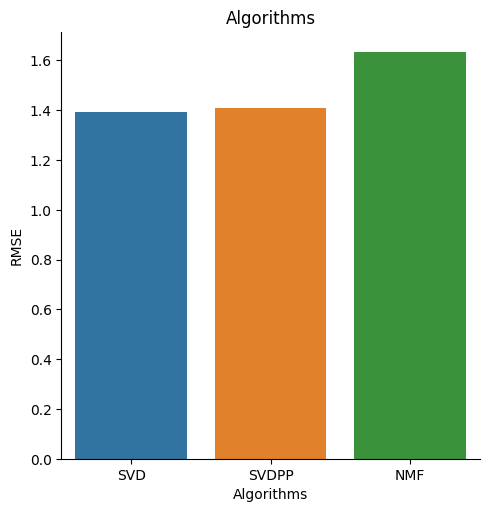

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.catplot(rmse, x='Algorithm', y='alg_rmse', kind='bar', height=5)
plt.xlabel('Algorithms')
plt.ylabel('RMSE')
plt.title('Algorithms')
plt.show()


In [ ]:
(preds_df['diff']<=1).mean()

0.4548563611491108

Here we can look for evaluation scores

In [ ]:
#Build full train and test
fulltrain=surdata.build_full_trainset()

In [ ]:
mysvd= FSVD(n_factors=100,n_epochs=10)
mysvd.fit(fulltrain)

In [ ]:
fulltest=fulltrain.build_anti_testset(fill=-1)
fulltest_preds=mysvd.test(fulltest)

In [ ]:
unotb=pd.DataFrame(fulltest_preds,columns=['user_id','business_id','ratings','predictions','details'])
unotb.sort_values(by=['predictions'],ascending=False)

,user_id,business_id,ratings,predictions,details
1247622,kfAs5S1XGtZZyO0QCuXD_g,VUKhLVz4X4zVS5wwjAxQjg,-1.0,5.000000,{'was_impossible': False}
21595,-nHUAn6IfY2U-Joq7CuLEQ,VUKhLVz4X4zVS5wwjAxQjg,-1.0,5.000000,{'was_impossible': False}
328090,CHuttPq3PpoKgdYnxAYKHQ,VUKhLVz4X4zVS5wwjAxQjg,-1.0,5.000000,{'was_impossible': False}
746012,SfmBwM314xNrr82EWHDRsw,VUKhLVz4X4zVS5wwjAxQjg,-1.0,5.000000,{'was_impossible': False}
328103,CHuttPq3PpoKgdYnxAYKHQ,45XW28tWd2PZT8GiytW7Ng,-1.0,5.000000,{'was_impossible': False}
...,...,...,...,...,...
885048,YBLLpDyCNp0BT1Sk96b7Ng,5-F3GQv6WHkHZPqyi1l-RQ,-1.0,1.747337,{'was_impossible': False}
3291,-4k3xbFSF8-di_3SSemKZw,guvNNiQurBpsjTxi96zaOw,-1.0,1.731976,{'was_impossible': False}
379765,E5Qm5W2BsMFCTirHq4DEIQ,5-F3GQv6WHkHZPqyi1l-RQ,-1.0,1.719030,{'was_impossible': False}
160965,5JRAEvsO_MmIU9DTppPdKg,5-F3GQv6WHkHZPqyi1l-RQ,-1.0,1.717377,{'was_impossible': False}


In [ ]:
unotb.shape[0]

1650010

In [ ]:
#merge final_rev_b and unotb ---> dataframe with predictions
pred_rev_b=unotb.merge(final_rev_b[['business_id','name','address','city','state','postal_code','latitude','longitude','stars_y','review_count','categories']].drop_duplicates(),how='left',left_on=['business_id'],right_on=['business_id'])

In [ ]:
pred_rev_b.shape[0]

1650010

In [ ]:
pred_rev_b.head(3)

,user_id,business_id,ratings,predictions,details,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,categories
0,--JfSCDuT5nsXCosHl5-IA,_OuzpHfM9Xo4_uY3OOeKlw,-1.0,3.660980,{'was_impossible': False},Thai Basil,590 E Boise Ave,Boise,ID,83706,43.580123,-116.175710,3.5,32,"Restaurants, Thai"
1,--JfSCDuT5nsXCosHl5-IA,e8ux7Vj2eZXawPG_31UhFA,-1.0,3.968403,{'was_impossible': False},C4 Creamery,3037 S Cole Rd,Boise,ID,83709,43.574937,-116.274545,4.5,41,"Restaurants, Food Stands, Ice Cream & Frozen Y..."
2,--JfSCDuT5nsXCosHl5-IA,kufyOf_7zifychP1WIP9FQ,-1.0,2.926446,{'was_impossible': False},Good Burger,"7609 W Overland Rd, inside chow",Boise,ID,83709,43.588826,-116.277394,2.5,15,"Burgers, Restaurants"


In [ ]:
pred_rev_b.drop(columns=['ratings','details'],inplace = True)

In [ ]:
pred_rev_b['b_diff'] = abs(pred_rev_b['stars_y']-pred_rev_b['predictions'])

In [ ]:
pred_rev_b[['predictions','stars_y','b_diff','review_count']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,predictions,stars_y,b_diff,review_count
count,1650010.00000,1650010.00000,1650010.00000,1650010.00000
mean,3.75146,3.77360,0.34015,22.94379
std,0.44655,0.77257,0.28918,13.59422
min,1.71342,1.50000,0.00000,5.00000
25%,3.47766,3.00000,0.11976,11.00000
50%,3.78557,4.00000,0.26112,21.00000
75%,4.06715,4.50000,0.48625,34.00000
max,5.00000,5.00000,1.93245,50.00000


In [ ]:

pred_rev_b[pred_rev_b['categories'].str.contains('Mexican')]

,user_id,business_id,predictions,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,b_diff
29,--JfSCDuT5nsXCosHl5-IA,142wnlNBm9UPkaFt519K4w,2.565644,Taco Time,785 S Progress Ave,Meridian,ID,83642,43.597506,-116.391882,1.5,24,"Restaurants, Mexican",1.065644
30,--JfSCDuT5nsXCosHl5-IA,BJZRXB6e1XkearWslqrt5w,3.731874,Taco Time,7965 W Fairview Ave,Boise,ID,83704,43.619101,-116.281194,3.5,17,"Mexican, Restaurants",0.231874
33,--JfSCDuT5nsXCosHl5-IA,ivwXw2QmPVrDE_hXxSRHyw,3.951403,Fiesta Chicken,1450 S Orchard St,Boise,ID,83705,43.591044,-116.243239,4.0,42,"Mexican, Restaurants",0.048597
50,--JfSCDuT5nsXCosHl5-IA,dl1QHd3dx_iMB0nz3P0rEg,3.242703,Fiesta Guadalajara A Family Mexican Restaurant,"3210 E Chinden Blvd, Ste 100",Eagle,ID,83616,43.664240,-116.353886,3.0,39,"Mexican, Restaurants",0.242703
64,--JfSCDuT5nsXCosHl5-IA,GP11taJlsbhnVXYxyMn-YA,3.290951,Chow Public Market and Eatery,"7609 W Overland Rd, Ste 130",Boise,ID,83709,43.588724,-116.277415,3.0,38,"Mediterranean, Nightlife, American (New), Rest...",0.290951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649963,zzgTMl_hyZC1hWDP0bHW3g,Tj_NfMHfabdjndcJ3MZY6A,3.835935,Los Reyes De La Torta,6125 W Fairview Ave,Boise,ID,83704,43.618733,-116.258272,5.0,5,"Mexican, Restaurants, Food, Food Trucks",1.164065
1649990,zzgTMl_hyZC1hWDP0bHW3g,eNJdfP3OM2brEsH6s55I0w,3.862405,Bluwave Tacos,,Boise,ID,83709,43.551657,-116.298790,4.0,5,"Food, Tacos, Food Trucks, Restaurants, Mexican",0.137595
1649997,zzgTMl_hyZC1hWDP0bHW3g,bjJXrAnFNkvItavB7e3wGQ,4.108910,Bronco Tacos,2455 Broadway Ave,Boise,ID,83706,43.581075,-116.193952,5.0,5,"Food, Food Trucks, Restaurants, Tacos, Mexican...",0.891090
1650001,zzgTMl_hyZC1hWDP0bHW3g,ftVH9Wh_7RkiqrC4o406Yg,3.934473,Two Guys Cookin,,Meridian,ID,83642,43.564436,-116.403457,5.0,6,"Street Vendors, Restaurants, Barbeque, Food, F...",1.065527


In [ ]:
pred_rev_b['categories'].unique()

array(['Restaurants, Thai',
       'Restaurants, Food Stands, Ice Cream & Frozen Yogurt, Food',
       'Burgers, Restaurants', 'Vietnamese, Restaurants, Asian Fusion',
       'Japanese, Food Delivery Services, Food, Restaurants, Sushi Bars',
       'Juice Bars & Smoothies, Food, Restaurants, Sandwiches, Wraps',
       'Chinese, Restaurants',
       'Restaurants, Food, Beer, Wine & Spirits, Cideries',
       'Restaurants, Pizza', 'Pizza, Restaurants',
       'Coffee & Tea, Food, Restaurants, Gluten-Free',
       'Food, Chinese, Asian Fusion, Restaurants, Diners, Salad, Food Delivery Services',
       'Pool Halls, Restaurants, Bars, Nightlife, Burgers, Food, Sports Bars, Beer, Wine & Spirits',
       'Restaurants, Pizza, Salad, Bars, Sandwiches, Nightlife',
       'Salad, Sandwiches, Restaurants, Pizza',
       'Italian, Restaurants, Pizza',
       'Arts & Entertainment, Restaurants, Active Life, Golf, Country Clubs, Fitness & Instruction, American (New), Golf Lessons',
       'Specialty

In [ ]:
pred_rev_b.head()

,user_id,business_id,predictions,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,b_diff
0,--JfSCDuT5nsXCosHl5-IA,_OuzpHfM9Xo4_uY3OOeKlw,3.660980,Thai Basil,590 E Boise Ave,Boise,ID,83706,43.580123,-116.175710,3.5,32,"Restaurants, Thai",0.160980
1,--JfSCDuT5nsXCosHl5-IA,e8ux7Vj2eZXawPG_31UhFA,3.968403,C4 Creamery,3037 S Cole Rd,Boise,ID,83709,43.574937,-116.274545,4.5,41,"Restaurants, Food Stands, Ice Cream & Frozen Y...",0.531597
2,--JfSCDuT5nsXCosHl5-IA,kufyOf_7zifychP1WIP9FQ,2.926446,Good Burger,"7609 W Overland Rd, inside chow",Boise,ID,83709,43.588826,-116.277394,2.5,15,"Burgers, Restaurants",0.426446
3,--JfSCDuT5nsXCosHl5-IA,vdvtDVlK6RKoZywoPOE-Ag,4.449065,Phở House Vietnamese Rice & Noodles,1534 N Main St,Meridian,ID,83642,43.617588,-116.391058,4.5,43,"Vietnamese, Restaurants, Asian Fusion",0.050935
4,--JfSCDuT5nsXCosHl5-IA,9xPOVj54VVum7SLZx0zcZQ,3.625664,Omakase Umi,2900 W Excursion Ln,Meridian,ID,83642,43.596440,-116.428797,3.5,7,"Japanese, Food Delivery Services, Food, Restau...",0.125664


In [ ]:
# This sorted df has all the detailsss -----> may be a final df for recommendations
sorteddf=pred_rev_b.sort_values(by='b_diff', ascending = True)
sorteddf.head(5)


,user_id,business_id,predictions,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,b_diff
1289111,mJEZ4UiEcfATIZtoyWhheg,VUKhLVz4X4zVS5wwjAxQjg,5.0,ā café,109 S 10th St,Boise,ID,83702,43.616756,-116.206361,5.0,50,"Restaurants, Cafes, Food, Coffee & Tea",0.0
900493,Ybjhe-ScFViXhJ4iaXu06Q,VUKhLVz4X4zVS5wwjAxQjg,5.0,ā café,109 S 10th St,Boise,ID,83702,43.616756,-116.206361,5.0,50,"Restaurants, Cafes, Food, Coffee & Tea",0.0
271094,9m2FgAAajMOy5lvD9YrUfQ,VUKhLVz4X4zVS5wwjAxQjg,5.0,ā café,109 S 10th St,Boise,ID,83702,43.616756,-116.206361,5.0,50,"Restaurants, Cafes, Food, Coffee & Tea",0.0
475621,IB2Zyn6ak7wt4YN-jBwP4w,VUKhLVz4X4zVS5wwjAxQjg,5.0,ā café,109 S 10th St,Boise,ID,83702,43.616756,-116.206361,5.0,50,"Restaurants, Cafes, Food, Coffee & Tea",0.0
1116833,fOlya64BlnYPMuzKqJIJ7g,VUKhLVz4X4zVS5wwjAxQjg,5.0,ā café,109 S 10th St,Boise,ID,83702,43.616756,-116.206361,5.0,50,"Restaurants, Cafes, Food, Coffee & Tea",0.0


In [ ]:

cat_pred_df = sorteddf[sorteddf['categories'].str.contains('Pizza')]
cat_pred_df.head(5)

,user_id,business_id,predictions,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,b_diff
1472361,tAcHT_NaNUlv2ZPZRiW7_w,EMzQIuFn8XWVgYbuoR4JDA,3.500000,Garbonzo's Pizza,710 W Ustick Rd,Meridian,ID,83646,43.634003,-116.402057,3.5,29,"Pizza, Restaurants",2.956165e-07
74000,1pTQLvl2A9ngW14UO_TZuw,YKhK6rCr7n0c2DaHkaZPDA,3.500003,Chuck E. Cheese,6255 Fairview Ave,Boise,ID,83704,43.618654,-116.259163,3.5,18,"Event Planning & Services, Party & Event Plann...",3.201539e-06
1628524,zC26DrRCtTJbci62VsPp0Q,HdV3iwFtEmvdaW9dYw_wlQ,4.000006,Alpine Pizza,7330 W State St,Boise,ID,83714,43.669059,-116.279501,4.0,22,"Restaurants, Bars, Pizza, Nightlife, Beer Bar,...",5.528042e-06
533689,KRqVd6-s4VYsAQKCDBthZA,n2m8q0S11Y1wRPV3-7Sl-A,3.500008,Chicago Connection - Downtown,310 N 4th St,Boise,ID,83702,43.614904,-116.196913,3.5,50,"Salad, Sandwiches, Pizza, Restaurants",7.798470e-06
729526,S4WH2rRk6S1Fdrwn8ZSVVw,VD4mZEBNiCeyGSq51XV9jw,4.499990,3 Wood Pizza & Pub,10497 W Lake Hazel Rd,Boise,ID,83709,43.545104,-116.312763,4.5,48,"Salad, Pizza, Restaurants, Gastropubs, Sandwiches",9.726919e-06


In [ ]:
city_pred_df = cat_pred_df[cat_pred_df['state']=='ID']
city_pred_df

,user_id,business_id,predictions,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,b_diff
1472361,tAcHT_NaNUlv2ZPZRiW7_w,EMzQIuFn8XWVgYbuoR4JDA,3.500000,Garbonzo's Pizza,710 W Ustick Rd,Meridian,ID,83646,43.634003,-116.402057,3.5,29,"Pizza, Restaurants",2.956165e-07
74000,1pTQLvl2A9ngW14UO_TZuw,YKhK6rCr7n0c2DaHkaZPDA,3.500003,Chuck E. Cheese,6255 Fairview Ave,Boise,ID,83704,43.618654,-116.259163,3.5,18,"Event Planning & Services, Party & Event Plann...",3.201539e-06
1628524,zC26DrRCtTJbci62VsPp0Q,HdV3iwFtEmvdaW9dYw_wlQ,4.000006,Alpine Pizza,7330 W State St,Boise,ID,83714,43.669059,-116.279501,4.0,22,"Restaurants, Bars, Pizza, Nightlife, Beer Bar,...",5.528042e-06
533689,KRqVd6-s4VYsAQKCDBthZA,n2m8q0S11Y1wRPV3-7Sl-A,3.500008,Chicago Connection - Downtown,310 N 4th St,Boise,ID,83702,43.614904,-116.196913,3.5,50,"Salad, Sandwiches, Pizza, Restaurants",7.798470e-06
729526,S4WH2rRk6S1Fdrwn8ZSVVw,VD4mZEBNiCeyGSq51XV9jw,4.499990,3 Wood Pizza & Pub,10497 W Lake Hazel Rd,Boise,ID,83709,43.545104,-116.312763,4.5,48,"Salad, Pizza, Restaurants, Gastropubs, Sandwiches",9.726919e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926667,ZjQ8TjFwSpExqD3MMUVfvQ,8l-Sbw88ehxMUnWfdosHog,3.677636,Little Caesars Pizza,1471 N Milwaukee St,Boise,ID,83704,43.618381,-116.285157,2.0,8,"Restaurants, Pizza",1.677636e+00
753171,Swow89_c54oIOYtiQuiWRw,8l-Sbw88ehxMUnWfdosHog,3.680388,Little Caesars Pizza,1471 N Milwaukee St,Boise,ID,83704,43.618381,-116.285157,2.0,8,"Restaurants, Pizza",1.680388e+00
867134,XXM1oQxLAGotGjyvbaaqBQ,8l-Sbw88ehxMUnWfdosHog,3.682899,Little Caesars Pizza,1471 N Milwaukee St,Boise,ID,83704,43.618381,-116.285157,2.0,8,"Restaurants, Pizza",1.682899e+00
989704,ao-AH4CKrHlJLdrxYm9reg,8l-Sbw88ehxMUnWfdosHog,3.720456,Little Caesars Pizza,1471 N Milwaukee St,Boise,ID,83704,43.618381,-116.285157,2.0,8,"Restaurants, Pizza",1.720456e+00


In [ ]:
df = city_pred_df[['city','categories','stars_y','name','latitude','longitude']].drop_duplicates().sort_values(by='stars_y',ascending=False)
df

,city,categories,stars_y,name,latitude,longitude
328122,Garden City,"Pizza, Restaurants, Sushi Bars, Sandwiches",5.0,Spirals Pizza & Sushi,43.725446,-116.262444
816644,Boise,"Restaurants, Event Planning & Services, Food, ...",5.0,Off the Grid Pizza,43.592121,-116.193330
7325,Boise,"Restaurants, Pizza",4.5,Firenza Pizza,43.616209,-116.205437
729526,Boise,"Salad, Pizza, Restaurants, Gastropubs, Sandwiches",4.5,3 Wood Pizza & Pub,43.545104,-116.312763
699745,Boise,"Restaurants, Pizza, Salad, Sandwiches",4.5,Casanova Pizzeria,43.620487,-116.220900
328296,Boise,"Restaurants, Pizza",4.5,Coned Pizza,43.617212,-116.205791
1557780,Boise,"Restaurants, Pizza",4.5,Papa Murphy's,43.595128,-116.213009
1163110,Boise,"Pizza, Food, Coffee & Tea, Restaurants, Italian",4.5,Papa's Cup of Joe,43.605500,-116.212194
226783,Meridian,"Italian, Beverage Store, Beer, Wine & Spirits,...",4.5,Margherita Pizza,43.602754,-116.354170
1094674,Boise,"Sandwiches, Pizza, Restaurants, Brewpubs, Brew...",4.0,Spring Creek Brewing,43.773686,-116.263948


In [ ]:
lat_long_vals= df[['latitude','longitude']].values

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.cluster import KMeans
# To know the quality of the cluster labels

In [ ]:


  #let us choose clusters=4 for better granuality
model=KMeans(n_clusters=4,random_state=42)
labels=model.fit(lat_long_vals)
  

In [ ]:
df['cluster']=model.predict(df[['latitude','longitude']]) 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KMeans was fitted without feature names



In [ ]:
df

,city,categories,stars_y,name,latitude,longitude,cluster
328122,Garden City,"Pizza, Restaurants, Sushi Bars, Sandwiches",5.0,Spirals Pizza & Sushi,43.725446,-116.262444,2
816644,Boise,"Restaurants, Event Planning & Services, Food, ...",5.0,Off the Grid Pizza,43.592121,-116.193330,3
7325,Boise,"Restaurants, Pizza",4.5,Firenza Pizza,43.616209,-116.205437,3
729526,Boise,"Salad, Pizza, Restaurants, Gastropubs, Sandwiches",4.5,3 Wood Pizza & Pub,43.545104,-116.312763,0
699745,Boise,"Restaurants, Pizza, Salad, Sandwiches",4.5,Casanova Pizzeria,43.620487,-116.220900,3
328296,Boise,"Restaurants, Pizza",4.5,Coned Pizza,43.617212,-116.205791,3
1557780,Boise,"Restaurants, Pizza",4.5,Papa Murphy's,43.595128,-116.213009,3
1163110,Boise,"Pizza, Food, Coffee & Tea, Restaurants, Italian",4.5,Papa's Cup of Joe,43.605500,-116.212194,3
226783,Meridian,"Italian, Beverage Store, Beer, Wine & Spirits,...",4.5,Margherita Pizza,43.602754,-116.354170,1
1094674,Boise,"Sandwiches, Pizza, Restaurants, Brewpubs, Brew...",4.0,Spring Creek Brewing,43.773686,-116.263948,2


In [ ]:
cluster_u1=model.predict([['43.581200','-116.172744']])[0]

In [ ]:
cluster_u1

3

In [ ]:
df[df['cluster']==cluster_u1].iloc[0:5][['city','categories','name','latitude','longitude']]

,city,categories,name,latitude,longitude
816644,Boise,"Restaurants, Event Planning & Services, Food, ...",Off the Grid Pizza,43.592121,-116.193330
7325,Boise,"Restaurants, Pizza",Firenza Pizza,43.616209,-116.205437
699745,Boise,"Restaurants, Pizza, Salad, Sandwiches",Casanova Pizzeria,43.620487,-116.220900
328296,Boise,"Restaurants, Pizza",Coned Pizza,43.617212,-116.205791
1557780,Boise,"Restaurants, Pizza",Papa Murphy's,43.595128,-116.213009


In [ ]:
df_result=df[df['cluster']==cluster_u1].iloc[0:10][['city','categories','name','latitude','longitude']]

In [ ]:
df_result

,city,categories,name,latitude,longitude
816644,Boise,"Restaurants, Event Planning & Services, Food, ...",Off the Grid Pizza,43.592121,-116.193330
7325,Boise,"Restaurants, Pizza",Firenza Pizza,43.616209,-116.205437
699745,Boise,"Restaurants, Pizza, Salad, Sandwiches",Casanova Pizzeria,43.620487,-116.220900
328296,Boise,"Restaurants, Pizza",Coned Pizza,43.617212,-116.205791
1557780,Boise,"Restaurants, Pizza",Papa Murphy's,43.595128,-116.213009
1163110,Boise,"Pizza, Food, Coffee & Tea, Restaurants, Italian",Papa's Cup of Joe,43.605500,-116.212194
1228279,Boise,"Local Services, Packing Services, Food, Profes...",USF Moving Company,43.594215,-116.244839
1043234,Boise,"Restaurants, Pizza, Chicken Wings, Salad",Pizza Twist,43.594208,-116.194040
1208305,Boise,"Restaurants, Pizza",Idaho Pizza Company,43.590114,-116.246294
711449,Boise,"Pizza, Restaurants",MOD Pizza,43.612926,-116.203890


In [ ]:
def trailrecs(food_category,lati,longi):


  cattrail_pred_df = sorteddf[sorteddf['categories'].str.contains(food_category)]
  dftrail = cattrail_pred_df[['city','categories','stars_y','name','latitude','longitude']].drop_duplicates().sort_values(by='stars_y',ascending=False)

  lat_long_vals_= dftrail[['latitude','longitude']].values

  #let us choose clusters=4 for better granuality
  model_trail=KMeans(n_clusters=4,random_state=42)
  labels=model_trail.fit(lat_long_vals_)

  dftrail['cluster']=model.predict(dftrail[['latitude','longitude']]) #gives cluster labels in columns 

  clustertrail=model_trail.predict([[lati,longi]])[0]

  df_result=dftrail[dftrail['cluster']==cluster_u1].iloc[0:10][['city','categories','name','stars_y','latitude','longitude']]
  
  return df_result



In [ ]:
sorteddf.columns

Index(['user_id', 'business_id', 'predictions', 'name', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'stars_y',
       'review_count', 'categories', 'b_diff'],
      dtype='object')

In [ ]:
user1 = trailrecs('Pizza',43.634003,-116.402057)

In [ ]:
user1_df = pd.DataFrame(user1)
user1_df

,city,categories,name,stars_y,latitude,longitude
816644,Boise,"Restaurants, Event Planning & Services, Food, ...",Off the Grid Pizza,5.0,43.592121,-116.193330
7325,Boise,"Restaurants, Pizza",Firenza Pizza,4.5,43.616209,-116.205437
699745,Boise,"Restaurants, Pizza, Salad, Sandwiches",Casanova Pizzeria,4.5,43.620487,-116.220900
328296,Boise,"Restaurants, Pizza",Coned Pizza,4.5,43.617212,-116.205791
1557780,Boise,"Restaurants, Pizza",Papa Murphy's,4.5,43.595128,-116.213009
1163110,Boise,"Pizza, Food, Coffee & Tea, Restaurants, Italian",Papa's Cup of Joe,4.5,43.605500,-116.212194
1228279,Boise,"Local Services, Packing Services, Food, Profes...",USF Moving Company,4.0,43.594215,-116.244839
1043234,Boise,"Restaurants, Pizza, Chicken Wings, Salad",Pizza Twist,4.0,43.594208,-116.194040
1208305,Boise,"Restaurants, Pizza",Idaho Pizza Company,3.5,43.590114,-116.246294
711449,Boise,"Pizza, Restaurants",MOD Pizza,3.5,43.612926,-116.203890


In [ ]:
user_map = px.scatter_mapbox(user1_df, lat='latitude',lon='longitude',color = 'name', size= 'stars_y' ,mapbox_style="carto-darkmatter")
user_map